#Objective

1) Download 50 images of dogs. 

2) Annotate bounding boxes around the dogs.

3) Download JSON file. 

4) Describe the contents of this JSON file in FULL details (you don't need to describe all 10 instances, anyone would work).

5) Find out the best total numbers of clusters. Upload link to your Colab File uploaded to GitHub. 


## JSON file - Annotation data for first file

 'images': [{'date_captured': '',
   'file_name': '1.jpeg',
   'height': 183,
   'id': 1,
   'license': 0,
   'width': 275},



'annotations': [{'area': 18447,
   'bbox': [62, 34, 143, 129],
   'category_id': 4,
   'id': 1,
   'image_id': 1,
   'iscrowd': 0,
   'segmentation': [[62, 34, 205, 34, 205, 163, 62, 163]]},


### Explanation - Important terms -

In 'images' key :
1) width - The actual width of the image on which the annotation is done - 421

2) height - The actual height of the image on which the annotation is done - 499

3) file_name - name of the image as in folder. (dog.4001.jpg)

In 'annotations' key

1) bbox - [107, 56, 221, 437],
   1) 107, 56 - These are the centre coordinates for the bounding box. 107 - x and 56 - y

   2) 221,437 - These are the width and height respective to bbox. Width=221, Height = 437
   


In [72]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [49]:
!pip install annotater

     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 112kB 8.2MB/s 
     |████████████████████████████████| 593kB 39.5MB/s 
     |████████████████████████████████| 163kB 35.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 122kB 22.6MB/s 
  Created wheel for annotater: filename=annotater-0.2-cp36-none-any.whl size=11390 sha256=c7cb0b3316e1cfd759b7858b1c08ccab82d24b04c0f7bfd42f4e8987af447503
  Stored in directory: /root/.cache/pip/wheels/a4/f3/47/fb452ed066aff541c5a66cfeb7df73e342e66d3a135e036fd8
  Created wheel for FormAlchemy: filename=FormAlchemy-1.5.5-cp36-none-any.whl size=125838 sha256=a001d9c56490d8a53eb2f8fae31a2f01a8c1a29b5b3973553ecd6ccf301bede2
  Stored in directory: /root/.cache/pip/wheels/52/2d/49/6d9bb6f78403009944936305d90641bcdd57c8478abc5f39a0
  Created wheel for Tempita: filename=Tempita-0.5.2-cp36-none-any.whl size=12882 sha

In [82]:
import os
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pprint
import pandas as pd


In [103]:
#os.listdir("drive/My Drive/EVA Session 12/B_dog_image_clustering/dog images")

In [74]:
with open('drive/My Drive/EVA Session 12/B_dog_image_clustering/dog images/final_coco.json') as f:
  dict_train = json.load(f)




In [93]:
dataset = dict()
dataset['Image'] = list()
dataset['Img-Width'] = list()
dataset['Img-Height'] = list()
dataset['Class'] = list()
dataset['Box-x'] = list()
dataset['Box-y'] = list()
dataset['Box-w'] = list()
dataset['Box-h'] = list()

In [94]:

for i in range(50):
    dataset['Image'].append(dict_train['images'][i]['file_name'])
    dataset['Img-Width'].append(dict_train['images'][i]['width'])
    dataset['Img-Height'].append(dict_train['images'][i]['height'])
    dataset['Class'].append('Dog')
    dataset['Box-x'].append(dict_train['annotations'][i]['bbox'][0])
    dataset['Box-y'].append(dict_train['annotations'][i]['bbox'][1])
    dataset['Box-w'].append(dict_train['annotations'][i]['bbox'][2])
    dataset['Box-h'].append(dict_train['annotations'][i]['bbox'][3])

In [95]:

# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(dataset, orient='index')
train = train.T

train.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,1.jpeg,275,183,Dog,62,34,143,129
1,2.jpeg,275,183,Dog,59,23,162,128
2,3.jpeg,275,183,Dog,13,22,226,118
3,4.jpeg,300,168,Dog,11,4,248,162
4,5.jpeg,275,183,Dog,119,33,107,129


In [102]:
train_final = train.copy()
for i in range(len(train_final)):
  #  print(i)
    train_final['Box-x'][i] = round(train_final['Box-x'][i]/train_final['Img-Width'][i],2)
    train_final['Box-y'][i] = round(train_final['Box-y'][i]/train_final['Img-Height'][i],2)
    train_final['Box-w'][i] = round(train_final['Box-w'][i]/train_final['Img-Width'][i],2)
    train_final['Box-h'][i] = round(train_final['Box-h'][i]/train_final['Img-Height'][i],2)

In [97]:
train_final.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,1.jpeg,275,183,Dog,0.23,0.19,0.52,0.7
1,2.jpeg,275,183,Dog,0.21,0.13,0.59,0.7
2,3.jpeg,275,183,Dog,0.05,0.12,0.82,0.64
3,4.jpeg,300,168,Dog,0.04,0.02,0.83,0.96
4,5.jpeg,275,183,Dog,0.43,0.18,0.39,0.7


# Using K-means to determine optimal the number of clusters

[[0.85047619 0.85238095]
 [0.42       0.73      ]
 [0.60608696 0.82521739]]


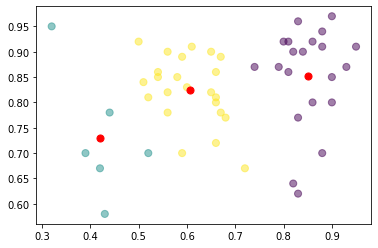

In [98]:
df = train_final[['Box-w','Box-h']]
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

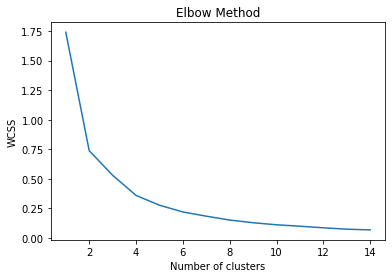

In [99]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[0.84833333 0.825     ]
 [0.44       0.686     ]
 [0.6625     0.8575    ]
 [0.86363636 0.92      ]
 [0.55090909 0.85      ]
 [0.84333333 0.65333333]
 [0.32       0.95      ]
 [0.664      0.728     ]]


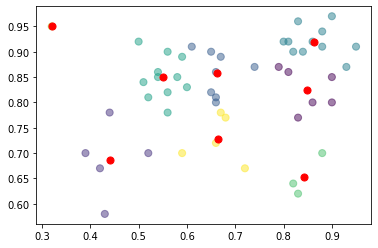

In [101]:
kmeans = KMeans(n_clusters=8).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [104]:
dict_train

{'annotations': [{'area': 18447,
   'bbox': [62, 34, 143, 129],
   'category_id': 4,
   'id': 1,
   'image_id': 1,
   'iscrowd': 0,
   'segmentation': [[62, 34, 205, 34, 205, 163, 62, 163]]},
  {'area': 20736,
   'bbox': [59, 23, 162, 128],
   'category_id': 4,
   'id': 2,
   'image_id': 2,
   'iscrowd': 0,
   'segmentation': [[59, 23, 221, 23, 221, 151, 59, 151]]},
  {'area': 26668,
   'bbox': [13, 22, 226, 118],
   'category_id': 4,
   'id': 3,
   'image_id': 3,
   'iscrowd': 0,
   'segmentation': [[13, 22, 239, 22, 239, 140, 13, 140]]},
  {'area': 40176,
   'bbox': [11, 4, 248, 162],
   'category_id': 4,
   'id': 4,
   'image_id': 4,
   'iscrowd': 0,
   'segmentation': [[11, 4, 259, 4, 259, 166, 11, 166]]},
  {'area': 13803,
   'bbox': [119, 33, 107, 129],
   'category_id': 4,
   'id': 5,
   'image_id': 5,
   'iscrowd': 0,
   'segmentation': [[119, 33, 226, 33, 226, 162, 119, 162]]},
  {'area': 21895,
   'bbox': [50, 21, 145, 151],
   'category_id': 4,
   'id': 6,
   'image_id': 6,
